# Scikit-Learn 맛보기
### Iris 분류 - 결정 트리, 서포트벡터머신(SVM), 로지스틱 회귀

#### 1. 데이터 전처리

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
type(iris)

sklearn.utils.Bunch

In [20]:
iris.keys()   # 자바의 object 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
# Feature data - numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [23]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
feature_names = []
for name in iris.feature_names:
    feature_names.append(name[:-5])

feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [44]:
# map과 lambda 함수
feature_names = list(map(lambda s: s[:-5], iris.feature_names))
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [50]:
# 리스트 표현식(List Comprehension)
feature_names = [name[:-5] for name in iris.feature_names]
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [26]:
# Target data - y
iris.target[:5]

array([0, 0, 0, 0, 0])

In [27]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [47]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target
df.tail(3)

,sepal length,sepal width,petal length,petal width,target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [32]:
df.groupby('target').describe()  # 데이터 프레임의 기초 통계랑을 출력해줌

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [51]:
df.groupby('target').agg(['mean','std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

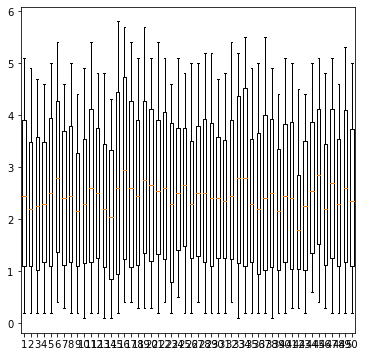

In [33]:
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:,:-1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

In [52]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

#### 2. 학습과 테스트 데이터로 분리

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=2021  # X에는 무조건 2차원, y는 1차원 => 2차원은 대문자, 1차원은 소문자가 국룰(de facto standard)
) # test_size는 25%가 default
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [35]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([36, 40, 44], dtype=int64))

In [36]:
# y값을 균일하게 뽑으려면 stratify 파라미터를 설정해 주어야 함
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021  # stratify는 값을 균등하게 꺼내줌
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

In [54]:
np.random.seed(2021) # 시드를 주는 이유 : 예를 들어, 그냥 랜덤해버리면 매번 값이 달라져서 정확도가 91~99% 등으로 매번 달라질 수 있기 때문
np.random.randint(0,101,10)

array([85, 57,  0, 94, 86, 44, 62, 91, 29, 21])

### 3. 학습

- Decision Tree(결정 트리)

- Estimator
    - Classifier
    - 

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2021)

In [56]:
# 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2021,
 'splitter': 'best'}

In [39]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

#### 4. 예측

In [40]:
pred_dt = dtc.predict(X_test)

In [57]:
pred_dt

array([0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

In [41]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


#### 5. 평가

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt)
print(f'정확도(DT): {acc:.4f}')

정확도(DT): 0.9000


In [43]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

- Support Vector Machine(SVM)

In [58]:
# 3)
from sklearn.svm import SVC
svc = SVC(random_state=2021)
svc.fit(X_train, y_train)

SVC(random_state=2021)

In [59]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [61]:
# 5) 평가
accuracy_score(y_test, pred_sv), svc.score(X_test, y_test)

(0.9, 0.9)

- Logistic Regression

In [62]:
# 3) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=500, random_state=2021)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2021)

In [63]:
# 4) 예측
pred_lr = lrc.predict(X_test)

In [65]:
# 5) 평가
accuracy_score(y_test, pred_lr), lrc.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333)

- 3가지 모델 결과 비교

In [66]:
res['SV'] = pred_sv
res['LR'] = pred_lr
res.head(10)

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,1,1,1,1
8,2,2,2,2
9,0,0,0,0


TypeError: pairplot() got multiple values for argument 'data'